In [1]:
from diffusers.models import AutoencoderKL
from diffusers import StableDiffusionPipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", local_files_only=True).to(device)

# 打印VAE的参数数量
print(f"VAE has {sum(p.numel() for p in vae.parameters())} parameters")

VAE has 83653863 parameters


In [3]:
latent_path = '/data/xuhao/datasets/new_latent_3300_preprocessed/shujuji20230106-1/video_bili_318_17/12.pt'
latent = torch.load(latent_path)

print(latent['upper_half'].shape)

torch.Size([4, 96, 96])


In [4]:
# 1. 编码与解码
with torch.no_grad():
    # 解码
    output_tensor = vae.decode(latent['upper_half'].to(device).unsqueeze(0)).sample
    
    # 打印输出张量的形状
    print("Output shape:", output_tensor.shape)


print(latent['upper_half'].min(), latent['upper_half'].max())
print(output_tensor.min(), output_tensor.max())

Output shape: torch.Size([1, 3, 768, 768])
tensor(-123.4349) tensor(66.0489)
tensor(-1.0088, device='cuda:0') tensor(0.6695, device='cuda:0')


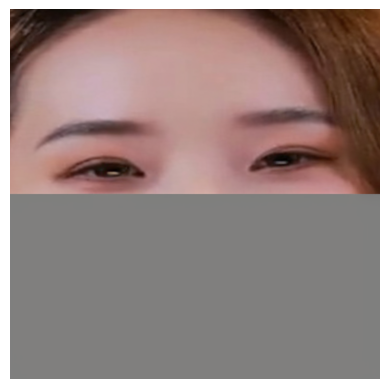

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# 1. 创建输出图片
output_image = (output_tensor.squeeze(0).add(1).div(2).clamp(0, 1) * 255).permute(1, 2, 0).byte().cpu().numpy()
output_image = Image.fromarray(output_image)

# 2. 显示输出图片
plt.imshow(output_image)
plt.axis("off")
plt.show()